In [94]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.linear_model import LogisticRegression

from sklearn import tree
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image



import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [95]:
df = pd.read_csv('Clothing_Store.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')
df.columns = df.columns.str.replace('-', '_')
df.drop([6268], inplace = True)

In [96]:
df["CreditCard_User"].describe()
df["WEB"].sum()
x=0
for i in df["MAILED"]:
    if i > 0:
        x=x+1
print(x)

6763


In [97]:
purchases=df["Num_Purchases"]
total_spend=df["TotalSpend"]
print(type(purchases))
print(df[0:0])

<class 'pandas.core.series.Series'>
Empty DataFrame
Columns: [HHKEY, ZIP_CODE, Num_Purchases, TotalSpend, CreditCard_User, Average_Spend, PC_CALC20, PSWEATERS, PKNIT_TOPS, PKNIT_DRES, PBLOUSES, PJACKETS, PCAR_PNTS, PCAS_PNTS, PSHIRTS, PDRESSES, PSUITS, POUTERWEAR, PJEWELRY, PFASHION, PLEGWEAR, Pother, PROMOS, DaysonFile, BeteenPurchases, MARKDOWN, COUPONS, STORES, WEB, MAILED, RESPONDED, RESPONSERATE, DiversitySpend, Perc_Returns, RESP]
Index: []


In [98]:
#שינוי עמודת הכרטיס אשראי לבינארית
df["CreditCard_User"]=np.where(df["CreditCard_User"]=="Yes",1,0)

In [99]:
#הטבלה עם העמודות שמעניינות אותנו באמת
#df=df.drop(columns="HHKEY","ZIP_CODE","Credit_Card_User","Average_Spend","PC_CALC20"]
df_reg=df[["TotalSpend","PROMOS","COUPONS","WEB","MAILED","RESPONDED","Perc_Returns","CreditCard_User","DiversitySpend"]]
pd.set_option('display.max_columns', 35) #replace n with the number of columns you want to see completely
df_corr=df_reg.corr()
print(df_corr)
df_reg=df_reg.drop(columns="RESPONDED")

                 TotalSpend    PROMOS   COUPONS       WEB    MAILED  \
TotalSpend         1.000000  0.449112  0.732746  0.213813  0.396139   
PROMOS             0.449112  1.000000  0.406527  0.146671  0.892671   
COUPONS            0.732746  0.406527  1.000000  0.185210  0.351516   
WEB                0.213813  0.146671  0.185210  1.000000  0.112079   
MAILED             0.396139  0.892671  0.351516  0.112079  1.000000   
RESPONDED          0.696184  0.652418  0.694055  0.192196  0.663458   
Perc_Returns       0.022416  0.099425  0.097552  0.049442  0.088268   
CreditCard_User    0.367435  0.417327  0.442141  0.135192  0.362191   
DiversitySpend    -0.371587 -0.325218 -0.308349 -0.124719 -0.300749   

                 RESPONDED  Perc_Returns  CreditCard_User  DiversitySpend  
TotalSpend        0.696184      0.022416         0.367435       -0.371587  
PROMOS            0.652418      0.099425         0.417327       -0.325218  
COUPONS           0.694055      0.097552         0.442141    

In [100]:
df.describe()

,HHKEY,ZIP_CODE,Num_Purchases,TotalSpend,CreditCard_User,Average_Spend,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,Pother,PROMOS,DaysonFile,BeteenPurchases,MARKDOWN,COUPONS,STORES,WEB,MAILED,RESPONDED,RESPONSERATE,DiversitySpend,Perc_Returns,RESP
count,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000
mean,4069.229692,23783.398919,5.174757,491.480172,0.364631,114.072791,12.728893,0.216124,0.028192,0.040739,0.096303,0.134984,0.086137,0.071568,0.068025,0.071081,0.031074,0.016538,0.008620,0.027233,0.011858,0.091524,11.542583,439.733317,168.667041,0.186400,0.774856,2.319651,0.042522,4.574290,1.199213,17.760414,37.705889,0.119398,0.162714
std,2349.400397,11219.560409,6.614931,663.126944,0.481356,86.390698,2.533743,0.232349,0.067772,0.108642,0.136890,0.182287,0.142445,0.134362,0.116221,0.156288,0.125559,0.092752,0.034663,0.074626,0.049043,0.134539,7.065151,195.369458,145.145553,0.128736,1.792024,1.604504,0.201789,3.550405,1.844698,25.279978,27.933818,0.378094,0.369127
min,1.000000,1001.000000,1.000000,5.000000,0.000000,2.500000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,0.000000
25%,2035.000000,15116.000000,1.000000,135.980000,0.000000,60.640000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,5.000000,285.000000,66.000000,0.080000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.340000,0.000000,0.000000
50%,4069.000000,27233.000000,3.000000,265.980000,0.000000,92.490000,11.000000,0.160000,0.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,12.000000,456.000000,123.600000,0.180000,0.000000,2.000000,0.000000,4.000000,0.000000,0.000000,29.560000,0.000000,0.000000
75%,6103.000000,33024.000000,6.000000,581.230000,1.000000,139.970000,16.000000,0.310000,0.030000,0.030000,0.140000,0.230000,0.130000,0.090000,0.100000,0.070000,0.000000,0.000000,0.000000,0.020000,0.000000,0.120000,17.000000,633.000000,226.000000,0.280000,1.000000,3.000000,0.000000,8.000000,2.000000,30.000000,50.000000,0.090000,0.000000
max,8138.000000,98433.000000,115.000000,12794.020000,1.000000,1331.940000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.920000,35.000000,713.000000,713.000000,0.590000,23.000000,17.000000,1.000000,11.000000,11.000000,100.000000,200.000000,10.520000,1.000000


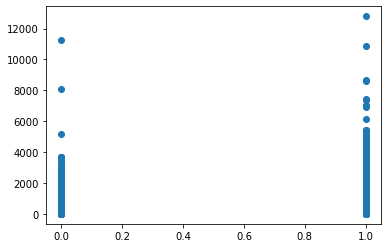

In [101]:
plt.scatter(df.CreditCard_User,df.TotalSpend)
plt.show()

In [102]:
#הרגרסיה
X=df_reg.drop(columns="TotalSpend")
y=df_reg["TotalSpend"]
training_set_fraction = 0.7
msk = np.random.rand(len(y)) < training_set_fraction
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(X_train),len(X_test)))
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Regression finished with R^2=',lm.score(X_test,y_test))
y_hat=lm.predict(X_test)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)
rmae=mae**(0.5)
rmse=mse**(0.5)
print("root of mse=",rmse)
importance=lm.coef_
the_brand_is_right = pd.Series(importance, index=X.columns)
sorted_importances=the_brand_is_right.sort_values()
print(sorted_importances)

Training set size: 5660
Test set size: 2477
Regression finished with R^2= 0.5229563751719304
root of mse= 467.7631977802996
Perc_Returns      -182.439099
CreditCard_User    -30.749730
DiversitySpend      -3.595315
MAILED               1.762289
PROMOS              13.082795
COUPONS            236.020380
WEB                236.335603
dtype: float64


In [103]:
#יצירת שתי טבלאות חדשות למתחת לחציון ומעל החציון
median_total_spend=df["TotalSpend"].median()
print(median_total_spend)
df["bigger_than_median"]=np.where(df["TotalSpend"]>=median_total_spend,1,0)
df_less_median=df.loc[df.bigger_than_median==0]
df_bigger_median=df.loc[df.bigger_than_median==1]

265.98


In [104]:
#t test
stats.ttest_ind(df_less_median["COUPONS"],df_bigger_median["COUPONS"],equal_var=False)
high_pvalue=[]
low_pvalue=[]
mean_bigger=[]
mean_less=[]
subject=[]
p_value=[]
for r in ["PROMOS","WEB","COUPONS","MAILED","RESPONDED","DiversitySpend","Perc_Returns"]:
    result=stats.ttest_ind(df_less_median[r],df_bigger_median[r],equal_var=False)
    if (result.pvalue < 0.05):
        high_pvalue.append(r)
        p_value.append("yes")
    else:
        low_pvalue.append(r)
        p_value.append("no")
    mean_bigger.append(df_bigger_median[r].mean())
    mean_less.append(df_less_median[r].mean())
    subject.append(r)
for r in ["PSWEATERS", "PKNIT_TOPS", "PKNIT_DRES", "PBLOUSES", "PJACKETS", "PCAR_PNTS", "PCAS_PNTS", "PSHIRTS", "PDRESSES", "PSUITS", "POUTERWEAR", "PJEWELRY", "PFASHION", "PLEGWEAR"]:
    result=stats.ttest_ind(df_less_median[r],df_bigger_median[r],equal_var=False)
    if (result.pvalue < 0.05):
        high_pvalue.append(r)
        p_value.append("yes")
    else:
        low_pvalue.append(r)
        p_value.append("no")
    mean_bigger.append(df_bigger_median[r].mean())
    mean_less.append(df_less_median[r].mean())
    subject.append(r)
print("high p value are: ",high_pvalue)
print("low p value are: ",low_pvalue)
d_means={"subject": subject, "mean_bigger": mean_bigger, "mean_less": mean_less, "significance": p_value}
df_means=pd.DataFrame(data=d_means)
df_means

    

high p value are:  ['PROMOS', 'WEB', 'COUPONS', 'MAILED', 'RESPONDED', 'DiversitySpend', 'Perc_Returns', 'PSWEATERS', 'PKNIT_TOPS', 'PBLOUSES', 'PJACKETS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'PJEWELRY', 'PFASHION', 'PLEGWEAR']
low p value are:  ['PKNIT_DRES', 'PCAR_PNTS', 'POUTERWEAR']


,subject,mean_bigger,mean_less,significance
0,PROMOS,14.838781,8.245575,yes
1,WEB,0.072499,0.012537,yes
2,COUPONS,1.450479,0.099066,yes
3,MAILED,6.112558,3.035644,yes
4,RESPONDED,2.126075,0.272124,yes
5,DiversitySpend,23.874040,51.541138,yes
6,Perc_Returns,0.128474,0.110320,yes
7,PSWEATERS,0.188372,0.243884,yes
8,PKNIT_TOPS,0.025071,0.031315,yes
9,PKNIT_DRES,0.039030,0.042448,no


In [105]:
#רגרסיה ליניארית על מתחת לחציון
df_reg=df_less_median[["TotalSpend","CreditCard_User", "PROMOS", "WEB", "COUPONS", "MAILED","Perc_Returns"]]


In [106]:
#רגרסיה ליניארית על הכל
df_reg=df[["TotalSpend","CreditCard_User", "PROMOS", "WEB", "COUPONS", "MAILED","Perc_Returns"]]
X=df_reg.drop(columns="TotalSpend")
y=df_reg["TotalSpend"]
training_set_fraction = 0.7
msk = np.random.rand(len(y)) < training_set_fraction
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(X_train),len(X_test)))
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Regression finished with R^2=',lm.score(X_test,y_test))
y_hat=lm.predict(X_test)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)
rmae=mae**(0.5)
rmse=mse**(0.5)
print("root of mse=",rmse)

Training set size: 5699
Test set size: 2438
Regression finished with R^2= 0.5359206464352415
root of mse= 473.2787530000227


In [107]:
pd.set_option('display.max_columns', 35) #replace n with the number of columns you want to see completely
df_describe=df.describe()
print(df_describe)


             HHKEY      ZIP_CODE  Num_Purchases    TotalSpend  \
count  8137.000000   8137.000000    8137.000000   8137.000000   
mean   4069.229692  23783.398919       5.174757    491.480172   
std    2349.400397  11219.560409       6.614931    663.126944   
min       1.000000   1001.000000       1.000000      5.000000   
25%    2035.000000  15116.000000       1.000000    135.980000   
50%    4069.000000  27233.000000       3.000000    265.980000   
75%    6103.000000  33024.000000       6.000000    581.230000   
max    8138.000000  98433.000000     115.000000  12794.020000   

       CreditCard_User  Average_Spend    PC_CALC20    PSWEATERS   PKNIT_TOPS  \
count      8137.000000    8137.000000  8137.000000  8137.000000  8137.000000   
mean          0.364631     114.072791    12.728893     0.216124     0.028192   
std           0.481356      86.390698     2.533743     0.232349     0.067772   
min           0.000000       2.500000    11.000000     0.000000     0.000000   
25%           

In [108]:
#sort of the means and the medians from the describe
means=df_describe.iloc[1,6:20]
means.sort_values(ascending=False)
medians=df_describe.iloc[5,6:20]
medians.sort_values(ascending=False)

PC_CALC20     11.00
PSWEATERS      0.16
PBLOUSES       0.05
PJACKETS       0.04
PFASHION       0.00
PJEWELRY       0.00
POUTERWEAR     0.00
PSUITS         0.00
PDRESSES       0.00
PSHIRTS        0.00
PCAS_PNTS      0.00
PCAR_PNTS      0.00
PKNIT_DRES     0.00
PKNIT_TOPS     0.00
Name: 50%, dtype: float64

percent of clients that buy in more than 5000 dollars:  0.2212117488017697
percent of clients that buy in more than 1000 dollars:  12.203514808897628
percent of clients that buy in less than 100 dollars:  14.513948629716111


<function print>

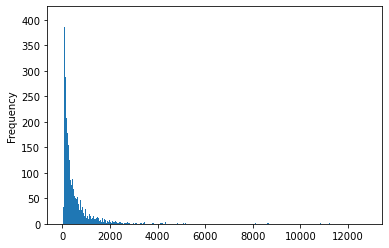

In [109]:
total_spend.plot.hist(by=None, bins=1000)
bigger_than_5000=0
bigger_than_1000=0
lower_than_100=0
for r in total_spend:
    if r > 5000:
        bigger_than_5000+=1
    if r > 1000:
        bigger_than_1000+=1
    if r < 100:
        lower_than_100+=1
        
bigger_than_5000=bigger_than_5000*100/len(total_spend)
bigger_than_1000=bigger_than_1000*100/len(total_spend)
lower_than_100=lower_than_100*100/len(total_spend)

print("percent of clients that buy in more than 5000 dollars: ",bigger_than_5000)
print("percent of clients that buy in more than 1000 dollars: ",bigger_than_1000)
print("percent of clients that buy in less than 100 dollars: ",lower_than_100)
print 

In [110]:
print(df.head())
print(df["ZIP_CODE"])

   HHKEY  ZIP_CODE  Num_Purchases  TotalSpend  CreditCard_User  Average_Spend  \
0      1      1001              2      368.46                0         184.23   
1      2      1028              4      258.00                1          64.50   
2      3      1056              2       77.00                0          38.50   
3      4      1118              8      846.06                1         105.75   
4      5      1107              1       87.44                0          87.44   

   PC_CALC20  PSWEATERS  PKNIT_TOPS  PKNIT_DRES  PBLOUSES  PJACKETS  \
0         11       0.18        0.00        0.00      0.30       0.0   
1         11       0.26        0.16        0.00      0.00       0.0   
2         11       1.00        0.00        0.00      0.00       0.0   
3         11       0.38        0.00        0.05      0.06       0.2   
4         11       0.20        0.20        0.00      0.00       0.0   

   PCAR_PNTS  PCAS_PNTS  PSHIRTS  PDRESSES  PSUITS  ...  PFASHION  PLEGWEAR  \
0      